## Manual Imports and Installs:

In [85]:
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
import matplotlib.pyplot as plt

# Load the Telco Data and display  
name = 'churn.csv'
data = pd.read_csv(name)

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial Data Exploration

In [86]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [87]:
# Check for missing or invalid values in the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [88]:

# handle TotalCharges Type (it should be numeric but may have invalid entries)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# fill with the median value
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# verify updates
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/var/folders/s_/kpvlk3bs5v7_vx6qt436qn400000gn/T/ipykernel_4881/1539093827.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


### Encoding Categorical Variables and Normalising Numerical Values.

In [89]:
# Encode categorical variables using LabelEncoder
categorical_columns = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod", "Churn"
]

# Initialize LabelEncoder
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Drop unnecessary columns (e.g., customerID as it's not useful for prediction)
data = data.drop(columns=["customerID"])

# Split data into features (X) and target (y)
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check data readiness
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 19), (1409, 19), (5634,), (1409,))

## Data Preprocessing SitRep:
### The data has now been preprocessed.

- Categorical variables have been encoded.
- Numerical variables have been normalised.
- The dataset is split into training and testing sets:

    - Training set: 5634 samples
    - Testing set: 1409 samples
    

## Training and Evaluating 
### 1) Logistic Regression

In [90]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_probs)
print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")
print(classification_report(y_test, lr_preds))


Logistic Regression:
Accuracy: 0.8006
ROC-AUC: 0.8403
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



The Logisitic Regression has an Accuracy of 80% and an 

## 2) Decision Tree

In [91]:
# Train and evaluate the DT
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# ACC and AUC
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_probs)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC-AUC: {dt_auc:.4f}")
print(classification_report(y_test, dt_preds))


Decision Tree:
Accuracy: 0.7303
ROC-AUC: 0.6625
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



The **Decision Tree** has an Accuracy of 73% and an ROC of 66%.

Decision Trees may overfit the training data, leading to poorer generalisation compared to Logistic Regression.

## 3) Random Forest

In [92]:
# Random Forest  fit, predict
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Accuracy and AUC
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC-AUC: {rf_auc:.4f}")
print(classification_report(y_test, rf_preds))


Random Forest:
Accuracy: 0.7913
ROC-AUC: 0.8222
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



The **Random Forest** managed to achieve 
- Accuracy : 79%
- AUC : 82% 

Similar to the previous models, it performs well for non-churned customers but struggles with recall for churned customers.
 
This can be seen via the Recall and Precision values for the 0 (non churned) and 1 (churned) class.

## 4) Simple Neural Network

In [93]:
# simple dense neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# compile
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# eval
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
nn_probs = nn_model.predict(X_test).flatten()
nn_auc = roc_auc_score(y_test, nn_probs)
nn_preds = (nn_probs > 0.5).astype(int)


# Display the eval metrics.
print("Dense Custom NN:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"ROC-AUC: {nn_auc:.4f}")
print(classification_report(y_test, nn_preds))


/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
Dense Custom NN:
Accuracy: 0.7892
ROC-AUC: 0.8363
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.67      0.41      0.51       374

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



This model shows suprisingly good results for such a simple network. Time to explore the results.

## Evaluation

In [94]:

model_performances = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Simple Neural Network"],
    "Accuracy": [lr_accuracy, dt_accuracy, rf_accuracy, nn_accuracy],
    "ROC-AUC": [lr_auc, dt_auc, rf_auc, nn_auc]
})

model_performances


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.800568,0.840290
1,Decision Tree,0.730305,0.662526
2,Random Forest,0.791341,0.822234
3,Simple Neural Network,0.789212,0.836315


The best Model ....

In [ ]:


def plot_model_performance(models, X_test, y_test):
    """
    Plots ROC curves for all models first, followed by confusion matrices in subplots.
    
    Parameters:
        models (dict): Dictionary with model names as keys and trained models as values.
        X_test (DataFrame): Test features.
        y_test (Series): True labels for test data.
    """
    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if model_name == "Simple Neural Network":
            # Special handling for the nn 
            y_prob = model.predict(X_test, verbose=0).flatten()
        elif hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            continue  # Skip models that cannot provide probabilities

        RocCurveDisplay.from_predictions(y_test, y_prob, name=model_name, ax=plt.gca())
    
    plt.title("ROC Curves for All Models")
    plt.show()

    # Step 2: Display all confusion matrices in a grid
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(15, 5))
    axes = axes.flatten()  # axes is iterable

    for idx, (model_name, model) in enumerate(models.items()):
        if model_name == "Simple Neural Network":
            # Special handling for the Keras model
            y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", ax=axes[idx])
        axes[idx].set_title(model_name)

    plt.tight_layout()
    plt.show()

    # Step 3: Print classification reports
    for model_name, model in models.items():
        if model_name == "Simple Neural Network":
            y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

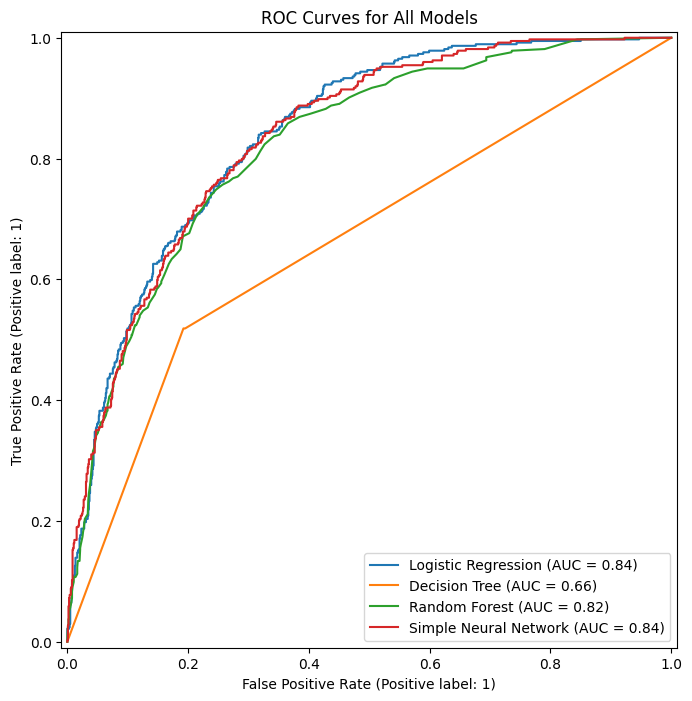

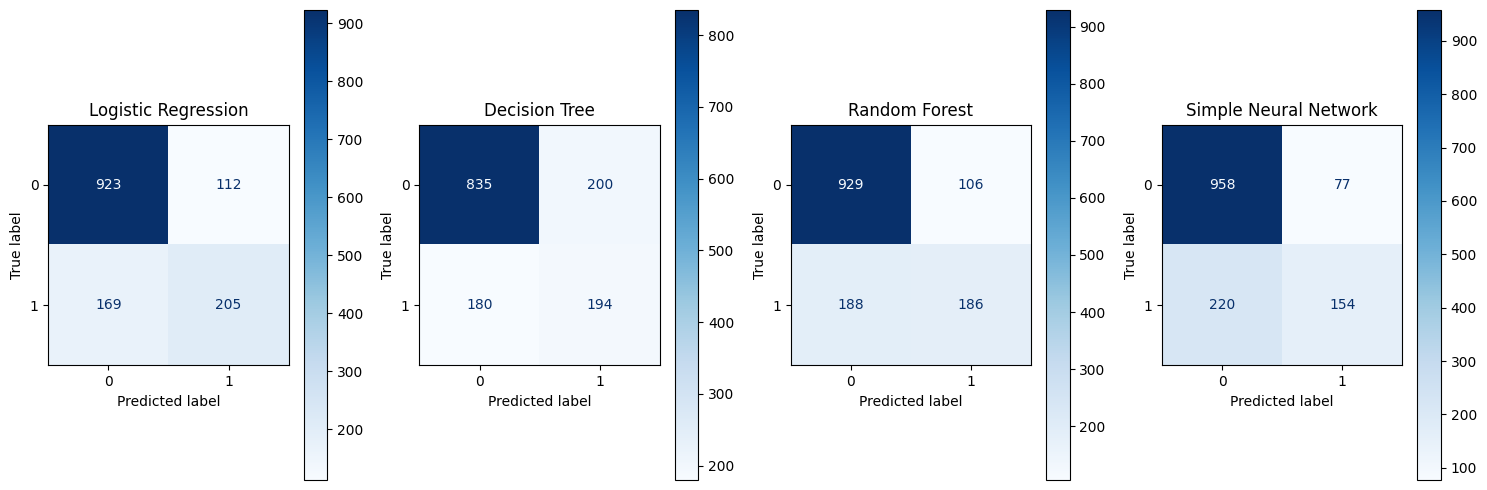

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409

In [96]:
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Simple Neural Network": nn_model
}
plot_model_performance(models, X_test, y_test)


So far, it seems the best model is the Logistic Regression. 